<center>
<img src="http://image.kyobobook.co.kr/images/book/xlarge/964/x9791162242964.jpg" width="250" height="250"><br>
</center>


- https://github.com/rickiepark/handson-ml2

# 핸즈온 머신러닝[2판]
 
## Chapter 2 머신러닝 프로젝트 처음부터 끝까지

이 장에서는 여러분이 부동산 회사에서 막 고용된 데이터 과학자라고 가정하고 예제 프로젝트의 처음부터 끝까지 진행해보겠다. 진행할 주요 단계는 다음과 같다.

1. 큰 그림을 본다.
2. 데이터를 구한다.
3. 데이터로부터 통찰을 얻기 위해 탐색하고 시각화 한다.
4. 머신러닝 알고리즘을 위해 데이터를 준비한다.
5. 모델을 선택하고 훈련시킨다
6. 모델을 상세하게 조정한다.
7. 솔루션을 제시한다.
8. 시스템을 론칭하고 모니터링하고 유지보수한다.

#### 2.1 실제 데이터로 작업하기

머신러닝을 배울 때는 인공적으로 만들어진 데이터셋이 아닌 실제 데이터로 실험해보는 것이 가장 좋다. 다행히 여러 분야에 걸쳐 공개된 데이터셋이 아주 많다. 다음은 데이터를 구하기 좋은 곳이다.

- 유명한 공개 데이터 저장소
    - UC 얼바인 머신러닝 저장소
    - 캐글 데이터셋
    - 아마존 AWS 데이터셋
- 메타 포털(공개 데이터 저장소가 나열되어 있다)
    - 데이터 포털
    - 오픈 데이터 모니터
    - 퀀들
- 인기 있는 공개 데이터 저장소가 나열되어 있는 다른 페이지
    - 위키백과 머신러닝 데이터셋 목록
    - Quora.com
    - 데이터셋 서브레딧
    
이 장에서는 StatLib 저장소에 있는 캘리포니아 주택 가격 데이터셋을 사용한다. 이 데이터셋은 1990년 캘리포니아 인구조사 데이터를 기반으로 한다. 최근 데이터는 아니지만 학습용으로 아주 좋기 때문에 최근 데이터라고 생각하고 진행한다. 교육 목적으로 사용하기 위해 범주형 특성을 추가하고 몇 개 특성을 제외했다.

https://goo.gl/QgRbUL (원본 데이터셋을 약간 수정한 버전을 사용)


#### 2.2 큰 그림 보기

맨 처음 할 일은 캘리포니아 인구조사 데이터를 사용해 캘리포니아의 주택 가격 모델을 만드는 것이다. 이 데이터는 캘리포니아의 블록 그룹마다 인구, 중간 소득, 중간 주택 가격 등을 담고있다. 블록 그룹은 미국 인구조사국에서 샘플 데이터를 발표하는 데 사용하는 최소한의 지리적 단위이다.(하나의 블록 그룹은 보통 600~3,000명의 인구를 나타낸다.)여기서는 간단하게 구역이라고 부르겠다.

이 데이터로 모델을 학습시켜서 다른 측정 데이터가 주어졌을 때 구역의 중간 주택 가격을 예측해야 한다.

#### 2.2.1 문제 정의

상사에게 첫 번째로 할 질문은 '비지니스의 목적이 정확히 무엇인가요?' 이다. 회사에서는 이 모델을 어떻게 사용해 이익을 얻으려고 할까? 목적을 아는 것은 문제를 어떻게 구성할지, 어떤 알고리즘을 선택할지, 모델 평가에 어떤 성능 지표를 사용할지, 모델 튜닝을 위해 얼마나 노력을 투여할지 결정하기 때문에 아주 중요하다.

상사가 이 모델의 출력(구역의 중간 주택 가격에 대한 예측)이 여러 가지 다른 신호와 함께 다른 머신러닝에 입력으로 사용된다고 이야기한다. 뒤따르는 시스템이 해당 지역에 투자할 가치가 있는지 결정한다.이 결정이 수익에 직결되기 때문에 올바르게 예측하는 것은 매우 중요하다.

다음으로 상사에게 던질 질문은 '현재 솔루션은 어떻게 구성되어 있나요?' 이다.(만약 있다면.) 현재 상황은 문제 해결 방법에 대한 정보는 물론이고 참고 성능으로도 사용할 수 있다. 상사가 현재는 구역 주택 가격을 전문가가 수동으로 추정한다고 알려주었다. 한 팀이 구역에 관한 최신 정보를 모으고 있는데 중간 주택 가격을 얻을 수 없을 때는 복잡한 규칙을 사용하여 추정한다.

이는 비용과 시간이 많이 들고 추정 결과도 썩 좋지 않다. 실제 중간 주택 가격을 구해보면 팀에서 추정한 것이 20% 이상 벗어났음을 알게 될 때가 많다. 이런 이유로 회사는 구역의 데이터를 기반으로 중간 주택 가격을 예측하는 모델을 훈련시키는 쪽지 유용하다고 생각한다. 인구조사 데이터에는 다른 데이터는 물론 수천 개 구역의 중간 주택 가격을 포함하므로 이 작업에 매우 적합한 데이터셋으로 보인다.

이제 이런 정보들을 가지고 시스템을 설계할 준비가 되었다. 먼저 문제를 정의해야 한다. 이는 지도학습, 비지도 학습, 강화 학습 중 무엇일까? 분류나 회귀인가요 아니면 다른 어떤 작업인가? 배치 학습과 온라인 학습 중 어느것을 사용해야 하나? 이 책을 계속 읽어 나가기 전에 잠시 멈추고 이 질문들의 답을 찾아보자.

레이블된 훈련 샘플이 있으니 이는 전형적인 지도 학습 작업이다. 또한 값을 예측해야 하므로 전형적인 회귀 문제이다. 좀 더 구체적으로는 예측에 사용할 특성이 여러 개 이므로 다중회귀 문제이다. 또한 각 구역마다 하나의 값을 예측하므로 단변량 회귀 문제이다. 구역마다 여러 값을 예측한다면 다변량 회귀 문제이다. 마지막으로 이 시스템으로 들어오는 데이터에 연속적인 흐름이 없으므로 빠르게 변하는 데이터에 적응하지 않아도 되고, 데이터가 메모리에 들어갈 만큼 충분히 작으므로 일반적인 배치 학습이 적절하다.

#### 2.2.2 성능 측정 지표 선택

다음 단계는 성능 측정 지표를 선택하는 것이다. 회귀 문제의 전형적인 성능 지표는 **평균 제곱근 오차 RMSE** 이다. 오차가 커질수록 이 값은 더욱 커지므로 예측에 얼마나 많은 오류가 있는지 가늠하게 해준다. RMSE가 일반적으로 회귀 문제에 선호되는 성능 측정 방법이지만 경우에 따라 다른 함수를 사용할 수도 있다. 예를 들어 이상치로 보이는 구역이 많다고 가정하자. 이런 경우에는 **평균 절대 오차 MSE**를 고려해볼 수 있다.

RMSE 와 MSE 모두 예측값의 벡터와 타깃값의 벡터 사이의 거리를 재는 방법이다. 거리 측정에는 여러 가지 방법이 가능하다.

#### 2.2.3 가정 검사

마지막으로 지금까지 만든 가정을 나열하고 검사해보는 것이 좋다. 이 과정에서 심각한 문제를 일찍 발견할 수도 있다. 예를 들어 시스템이 출력한 구역의 가격이 다음 머신러닝 시스템의 입력으로 들어가게 되는데 이 값이 있는 그대로 사용될 거라 가정했다. 하지만 하위 시스템에서 이 값을('저렴','보통','고가')같은 카테고리로 바꾸고 가격 대신 카테고리를 사용하면 어떻게 될까? 이럴 때는 정확한 가격을 구하는 것이 전혀 중요하지 않다. 올바르 카테고리를 구하는 시스템이 필요하다. 그렇다면 이제 이 문제는 회귀가 아니라 분류 작업이 된다. 몇 달 동안 회귀 시스템을 구축하고 나서야 이런 사실을 깨닫게 되는 것을 아무도 원치 않을 것이다.

다행히도 하위 시스템을 담당하는 팀과 대화 후 그들이 카테고리가 아니라 실제 가격을 사용한다는 것을 확인했다.

#### 2.3 데이터 가져오기

#### 2.3.1 작업환경 구축하기
#### 2.3.2 데이터 다운로드


In [1]:
# 실제 프로제트에서는 이 코드를 파이썬 파일에 저장하지만 여기서는 그냥 주피터 노트북에 작성한다.

import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data() 를 호출하면 현재 작업공간에 datasets/housing 디렉터리를 만들고 housing.tgz 파일을 내려 받고 같은 디렉터리에 압축을 풀어 housing.csv 파일을 만든다.

In [2]:
fetch_housing_data()

In [3]:
# 이 함수는 모든 데이터를 담은 판다스의 데이터프레임 객체를 변환한다.

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

#### 2.3.3 데이터 구조 훑어보기

DataFrame의 head() 메서드를 사용해 처음 다섯 행을 확인한다.

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


각 행은 하나의 구역을 나타낸다. 특성은 longitude	latitude	housing_median_age	total_rooms	total_bedrooms	population	households	median_income	median_house_value	ocean_proximity 등 10개이다.

info() 메서드는 데이터에 대한 간략한 설명과 특히 전체 행 수, 각 특성의 데이터 타입과 널null이 아닌 값을 개수를 확인하는 데 유용하다.

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


데이터셋에 20,640개의 샘플이 들어 있다. 머신러닝 프로젝트치고는 상당히 작은 편이지만, 처음 시작하기에는 적당한 크기이다. total_bedrooms특성은 20,433개만 널 값이 아니다. 207개의 구역은 이 특성을 가지고 있지 않다는 것을 뜻한다. 나중에 이 문제를 적절히 처리하겠다.

ocean_proximity 필드만 빼고 모든 특성이 숫자형이다. ocean_proximity 필드의 데이터 타입이 object이므로 어떤 파이썬 객체도 될 수 있지만, 데이터를 CSV 파일에서 읽어 들였기 때문에 텍스트 특성일 것이다. 처음 다섯 행을 출력했을 때 ocean_proximity 열의 값이 반복되는 것으로 보아서 이 특성은 아마도 범주형 일 것이다. 어떤 카테고리가 있고 각 카테고리마다 얼마나 많은 구역이 있는지 values_counts() 메서드로 확인한다.

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


describe()메서드는 숫자형 특성의 요약 정보를 보여준다.

데이터의 형태를 빠르게 검토하는 다른 방법은 각 숫자형 특성을 히스토그램으로 그려보는 것이다. 히스토그램은 주어진 값의 범위(수평축)에 속한 샘플 수(수직축)을 나타낸다. 특성마다 따로 히스토그램을 그릴 수도 있고 (다음 코드 예제처럼) 전체 데이터셋에 대해 hist()메서드를 호출하면 모든 숫자형 특성에 대한 히스토그램을 출력한다.

주피터 매직 명령 %matplotlib inline 을 사용하면 편리하다

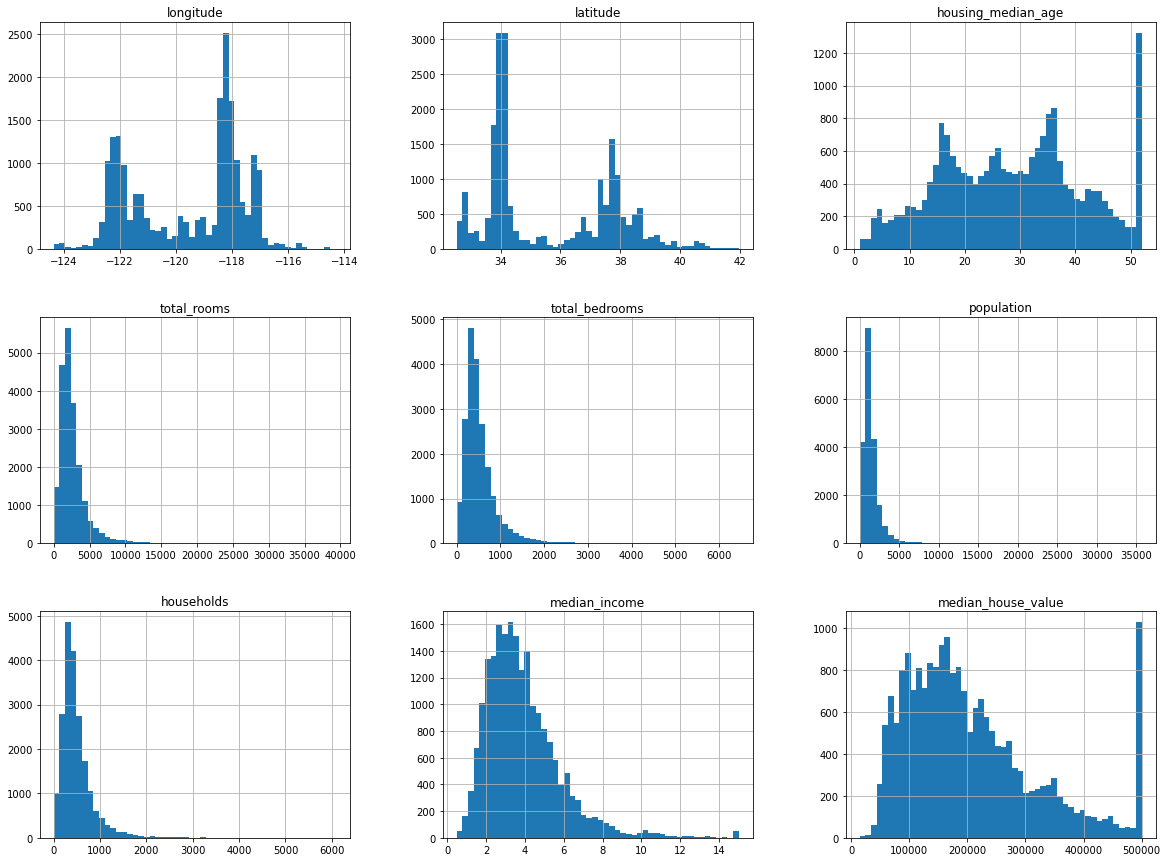

In [8]:
%matplotlib inline   
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))

plt.show()

이 히스토그램에서 몇 가지 사항을 확인할 수 있다.

1. 먼저 중간 소득 medium inccome 특성이 US 달러로 표현되어 있지 않은 것 같다. 데이터를 취합한 팀에 확인해보니 스케일을 조정하고, 상한이 15(실제로는 15.0001), 하한이 0.5(실제로는 0.4999)가 되도록 만들었다고 한다. 대략 수만 달러는 나타낸다.(예를 들어 3은 실제로 약 30,000 달러를 의미한다.) 머신러닝에서는 전처리된 데이터를 다루는 경우가 흔하고 이것이 문제가 되지는 않지만 데이터가 어떻게 계산된 것인지 반드시 이해하고 넘어가야한다.


2. 중간 주택 연도 housing median age 와 중간 주택 가격 median house value 역시 최댓값과 최솟값을 한정했다. 중간 주택 가격의 경우에는 타깃 속성(레이블)으로 사용되기 때문에 심각한 문제가 될 수 있다. 가격이 한곗값을 넘어가지 않도록 머신러닝 알고리즘이 학습될지도 모른다. 이것이 문제가 될지 안될지는 클라이언트 팀(이 시스템의 출력을 사용할 팀)과 함께 검토하는 것이 좋다. 만약 그 팀에서 $500,000를 넘어가더라도 정확한 예측값이 필요하다고 한다면 우리가 선택할 수 있는 방법은 2가지 이다.
    - a. 한곗값 밖의 구역에 대한 정확한 레이블을 구한다.
    - b. 훈련 세트에서 이런 구역을 제거한다.(테스트 세트에서도 제거한다.)


3. 특성들의 스케일이 서로 많이 다르다. 특성 스케일에 대해서 살펴본다.


4. 마지막으로 많은 리스토그램의 꼬리가 두껍다. 가운데에서 왼쪽보다 오른쪽으로 더 멀리 뻗어 있다. 이런 형태는 일부 머신러니 알고리즘에서 패턴을 찾기 어렵게 만든다. 나중에 이런 특성들을 좀 더 종 모양의 분포가 되도록 변형시킨다.

#### 2.3.4 테스트 세트 만들기

이 단계에서 데이터 일부를 자진해서 떼어놓으라는 것이 이상하게 들릴지 모르겠다. 지금까지 데이터를 잠시 살펴봤을 뿐이고 어떤 알고리즘을 사용할지 정하기 전에 전체 데이터를 자세히 파악해야 한다. 하지만 우리 뇌는 매우 과대적합되기 쉬운 엄청난 패턴 감지 시스템이다. 만약 테스트 세트를 들여다본다면 테스트 세트에서 겉으로 드러난 어떤 패턴에 속아 특정 머신러닝 모델을 선택하게 될지도 모른다. 이 테스트 세트로 일반화 오차를 추정하면 매우 낙관적인 추정이 되며 시스템을 론칭했을 때 기대한 성능이 나오지 않을 것이다. 이를 **데이터 스누핑** 편향이라고 한다.

테스트 세트를 생성하는 일은 이론적으로 간단하다. 무작위로 어떤 샘플을 선택해서 데이터셋의 20%정도를(또는 데이터셋이 매우 크다면 그보다 적게) 떼어놓으면 된다.

In [9]:
# 노트북의 실행 결과가 동일하도록
import numpy as np
np.random.seed(42)

In [10]:
# 예시로 만든 것입니다. 실전에서는 사이킷런의 train_test_split()를 사용하세요.
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(housing, 0.2)

In [12]:
len(train_set)

16512

In [13]:
len(test_set)

4128

이것도 괜찮지만 완벽하지 않다. 프로그램을 다시 실행하면 다른 테스트 세트가 생성된다. 여러 번 계속하면 우리는(또는 우리 머신러닝 알고리즘이) 전체 데이터셋을 보는셈이므로 이런 상황은 피해야한다.

한 가지 해결책은 처음 실행에서 테스트 세트를 저장하고 다음번 실행에서 이를 불러들이는 것이다. 또 다른 방법은 항상 같은 난수 인덱스가 생성되도록 np.random.permutation()을 호출하기 전에 난수 발생기의 초깃값을 지정하는 것이다. 예를들면 np.random.seed(42)

하지만 이 두 해법 모두 다음번에 업데이트된 데이터셋을 사용하려면 문제가 된다. 데이터셋을 업데이트한 후에도 안정적인 훈련/테스트 분할을 위한 일반적인 해결책은 샘플의 식별자를 사용하여 테스트 세트로 보낼지 말지 정하는 것이다. 예를 들어 각 샘플마다 식별자의 해시값을 계산하여 해시 최댓값의 20%보다 작거나 같은 샘플만 테스트 세트로 보낼 수 있다. 이렇게 하면 여러 번 반복 실행되면서 데이터셋이 갱신되더라도 테스트 세트가 동일하게 유지 된다. 새로운 테스트 세트는 새 샘플의 20%를 갖게 되지만 이전에 훈련 세트에 있던 샘플은 포함시키지 않을 것이다.

다음은 이를 구현한 코드이다.



In [14]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set =  ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]

안타깝게도 주택 데이터셋에는 식별자 컬럼이 없다. 대신 행의 인덱스를 ID로 사용하면 간단히 해결 된다.

In [15]:
housing_with_id = housing.reset_index()  # index 열이 추가된 데이터프레임이 반환 된다.

train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

행의 인덱스를 고유 식별자로 사용할 때 새 데이터는 데이터셋의 끝에 추가되어야 하고 어떤 행도 삭제되지 않아야 한다. 이것이 불가능할 땐 고유 식별자를 만드는 데 안전한 특성을 사용해야 한다. 예를 들어 구역의 위도와 경도는 몇백 년 후까지 안정적이라고 보장할 수 있으므로 두 값을 연결하여 다음과 같이 ID를 만들 수 있다.

In [16]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

사이킷런은 데이터셋을 여러 서브셋으로 나누는 다양한 방법을 제공한다. 가장 간단한 함수는 train_test_split으로, split_train_test와 아주 비슷하지만 두 가지 특징이 더 있다. 첫째, 앞서 설명한 난수 초깃값을 지정할 수 있는 random_state 매개변수가 있고, 둘째, 행의 개수가 같은 여러 개의 데이터셋을 넘겨서 인덱스를 기반으로 나눌 수 있다.(이는 예를 들어 데이터프레임이 레이블에 따라 여러 개로 나뉘어 있을 때 매우 유용하다.)

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

지금까지는 순수한 무작위 샘플링 방식을 보았다. 데이터셋이 충분히 크다면 일반적으로 괜찮지만, 그렇지 않다면 샘플링 편향이 생길 가능성이 크다. 설문조사 기관에서 1,000명에게 질문 몇 개를 하려 할때 그냥 전화번호부에서 1,000명을 무작위로 뽑는 것이 아니다. 전체 인구수를 대표할 수 있는 1,000명을 선택하기 위해 노력한다.

미국 인구의 51.3%가 여성이고 48.7%가 남성이라면, 잘 구성된 설문조사는 샘플에서도 이 비율을 유지해야 한다. 즉, 여성은 513명, 남성은 487명이어야한다. 이를 **계층적 샘플링**이라고 한다. 전체 인구는 **계층**이라는 동질의 그룹으로 나뉘고, 테스트 세트가 전체 인구를 대표하도록 각 계층에서 올바른 수의 샘플을 추출한다. 완전한 무작위 샘플링을 사용하여 설문을 진행하면 49%보다 적거나 54%보다 많은 여성이 테스트 세트에 들어갈 확률이 약 12%이다. 어느 방법을 사용하든 설문조사 결과를 크게 편향시키게 된다.


전문가가 중간 소득이 중간 주택 가격을 예측하는 데 매우 중요하다고 이야기했다고 가정해보자. 이 경우 테스트 세트가 전체 데이터셋에 있는 여러 소득 카테고리를 잘 대표해야 한다. 중간 소득이 연속적인 숫자형 특성이모르 소득에 대한 카테고리 특성을 만들어야 한다. 중간 소득의 히스토그램을 조금 더 자세히 살펴보자. 중간 소득 대부분은 1.5에서 6 사이에 모여 있지만 일부는 60,000를 넘기도 한다. 계층별로 데이터셋에 충분한 샘플 수가 있어야 한다. 그렇지 않으면 계층의 중요도를 추정하는데 편향이 발생할 것이다. 이 말은 너무 많은 계층으로 나누면 안 된다는 뜻이고 각 계층이 충분히 커야 한다는 것이다. 다음 코드는 pd.cut() 함수를 사용해 카테고리 5개를 가진 소득 카테고리 특성을 만든다.(1에서 5까지 레이블으 가진다.) 카테고리 1은 0에서 1.5까지 범위(즉 $15,000이하)이고 카테고리 2는 1.5에서 3까지 범위가 되는 식이다.

In [18]:
# pd.cut() 함수를 사용해 카테고리를 5개, 카테고리 범위 지정

housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0.,1.5, 3.0, 4.5, 6, np.inf],
                              labels=[1,2,3,4,5])

<AxesSubplot:>

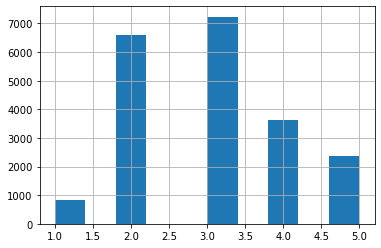

In [19]:
housing["income_cat"].hist()   # 소득 카테고리의 히스토그램

이제 소득 카테고리를 기반으로 계층 샘플링을 할 준비가 되었다. 사이킷런의 Stratified ShuffleSplit를 사용할 수 있다.

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

의도대로 되었는지 살펴보자. 테스트 세트에서 소득 카테고리의 비율을 먼저 살펴보자.

In [21]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

비슷한 코드로 전체 데이터셋에 있는 소득 카테고리의 비율을 측정한다. 전체 데이터셋과 계층 샘플링으로 만든 테스트 세트에서 소득 카테고리 비율을 비교한 것이다. 그림에서 보듯이 계층 샘플링을 사용해 만든 테스트 세트가 전체 데이터셋에 있는 소득 카테고리의 비율과 거의 같다. 반면 일반 무작위 샘플링으로 만든 테스트 세트는 비율이 많이 달라졌다.

이제 income_cat 특성을 삭제해서 데이터를 원래 상태로 되돌리겠다.

In [22]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

테스트 세트 생성에 대해 설명하는 데에는 그럴 만한 이유가 있다. 종종 등한시되기도 하지만 머신러닝 프로젝트에서 아주 중요한 부분이기 때문이다. 게다가 이런 아이디어들은 나중에 교차 검증에 대해 이야기할때 도움이 된다. 이ㅔ 데이터를 탐색하는 단계로 넘어가자.

#### 2.4 데이터 이해를 위한 탐색과 시각화

지금까지는 다뤄야 할 데이터의 종류를 파악하기 위해 데이터를 간단히 살펴보았다. 이제 조금 더 싶이 파악해보도록 하겠다.

먼저 테스트 세트를 떼어놓았는지 확인하고 훈련 세트에 대해서만 탐색을 하겠다. 또한 훈련 세트가 매우 크면 조작을 간단하고 빠르게 하기 위해 탐색을 위한 세트를 별도로 샘플링할 수도 있다. 예제에서는 크기가 작으므로 훈련 세트 전체를 사용하겠다. 훈련 세트를 손상시키지 않기 위해 복사본을 만들어 사용한다.

In [24]:
housing = strat_train_set.copy()

#### 2.4.1 지리적 데이터 시각화

지리 정보(위도와 경도)가 있으니 모든 구역을 산점도로 만들어 데이터를 시각화하는 것은 좋은 생각이다.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

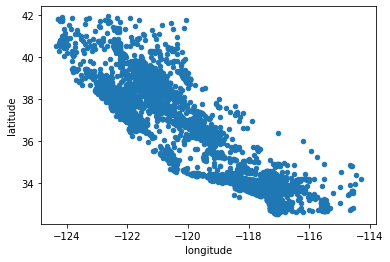

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude")